In [1]:
%matplotlib widget 


from matplotlib.pylab import plt 


In [2]:
im = plt.imread('test.png')

In [3]:
plt.imshow(im)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [6]:
import fiona 
import rasterio


In [7]:
vds = fiona.open('export.geojson')

In [8]:
rec1 = vds[0]

In [9]:
rec1

{'type': 'Feature',
 'id': '0',
 'properties': OrderedDict([('id', 'way/4245318'),
              ('@id', 'way/4245318'),
              ('highway', 'primary'),
              ('lanes', '3'),
              ('lit', 'yes'),
              ('maxspeed', '50'),
              ('name', 'Lungotevere dei Sangallo'),
              ('oneway', 'yes'),
              ('source:maxspeed', 'IT:urban'),
              ('surface', 'asphalt'),
              ('cycleway:left', None),
              ('is_in:city', None),
              ('alt_name', None),
              ('short_name', None),
              ('cycleway:right', None),
              ('electrified', None),
              ('frequency', None),
              ('gauge', None),
              ('nat_name', None),
              ('railway', None),
              ('voltage', None),
              ('bridge', None),
              ('layer', None),
              ('start_date', None),
              ('wikidata', None),
              ('wikipedia', None),
              ('sidew

In [10]:
print(vds['copyright'])
vds.meta

None


{'driver': 'GeoJSON',
 'schema': {'properties': OrderedDict([('id', 'str'),
               ('@id', 'str'),
               ('highway', 'str'),
               ('lanes', 'str'),
               ('lit', 'str'),
               ('maxspeed', 'str'),
               ('name', 'str'),
               ('oneway', 'str'),
               ('source:maxspeed', 'str'),
               ('surface', 'str'),
               ('cycleway:left', 'str'),
               ('is_in:city', 'str'),
               ('alt_name', 'str'),
               ('short_name', 'str'),
               ('cycleway:right', 'str'),
               ('electrified', 'str'),
               ('frequency', 'str'),
               ('gauge', 'str'),
               ('nat_name', 'str'),
               ('railway', 'str'),
               ('voltage', 'str'),
               ('bridge', 'str'),
               ('layer', 'str'),
               ('start_date', 'str'),
               ('wikidata', 'str'),
               ('wikipedia', 'str'),
               ('sidewalk'

In [11]:
vds.items

<bound method Collection.items of <open Collection 'export.geojson:export', mode 'r' at 0x7f77b742a510>>

In [12]:
rec1['geometry']

{'type': 'LineString',
 'coordinates': [(12.4665536, 41.8964477),
  (12.466416, 41.896553),
  (12.4663618, 41.8965935),
  (12.4662048, 41.8967167),
  (12.4660654, 41.8968361),
  (12.4659786, 41.8969302)]}

In [13]:
import shapely.geometry

In [14]:
rec1['properties']['highway']

'primary'

In [15]:
s = shapely.geometry.shape(rec1['geometry'])

In [16]:
s.xy


(array('d', [12.4665536, 12.466416, 12.4663618, 12.4662048, 12.4660654, 12.4659786]),
 array('d', [41.8964477, 41.896553, 41.8965935, 41.8967167, 41.8968361, 41.8969302]))

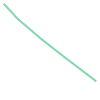

In [17]:
s

In [50]:
x,y = s.xy

In [20]:
plt.figure('roads')
plt.plot(x,y,c='r')


In [21]:
# so here is the things, these values are in logitude and lattitude
# vertical lattitudes, horizontal longitudes

In [22]:
import rasterio as rio

In [23]:
filename = 'tifinWTGS_format.tif'

In [73]:
rds1 = rio.open(filename)

In [25]:
import rasterio.transform

In [26]:
# now due to the image coordinates we wanna change either one or another 
# orientation
# we can use qgis to do it 
# we are uploading our tif file and then putting it into the format we want
# in our case WTGS format 

# we can change the cooordinates system and the img will be align with
# the new coordinate system

In [137]:
rds1.affine*(100,50)

AttributeError: 'DatasetReader' object has no attribute 'affine'

In [34]:
[rds.index(x_,y_) for x_,y_ in zip(x,y)]
# creating the map coordinatesabs

[(-1136033, 13481802),
 (-1136052, 13481781),
 (-1136060, 13481773),
 (-1136082, 13481749),
 (-1136104, 13481728),
 (-1136121, 13481715)]

In [35]:
# we use * because it's a tuple co we have to unpack (*unpacks)
pixel_shape = [rds.index(x_,y_) for x_,y_ in zip(*s.xy)]


In [36]:
pixel_shape

[(-1136033, 13481802),
 (-1136052, 13481781),
 (-1136060, 13481773),
 (-1136082, 13481749),
 (-1136104, 13481728),
 (-1136121, 13481715)]

In [38]:
# we took the shape of the map coordinates and we go into the pixel orientation
# in the image 
[rds.affine*pixel_xy for pixel_xy in pixel_shape]

AttributeError: 'DatasetReader' object has no attribute 'affine'

In [39]:
# we can easily, as above go back an forward between different orientation


In [40]:
import rasterio.plot as rp

In [41]:
plt.close()
plt.figure('overlay')
rp.show(rds,ax = plt.gca())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/maciek/yes/envs/cse620b/lib/python3.7/site-packages/rasterio/plot.py:109: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  arr = source.read(rgb_indexes, masked=True)


<AxesSubplot:>

# Week2

In [42]:
import shapely 
import shapely.geometry 

In [43]:
c = shapely.geometry.shape(rec1['geometry'])

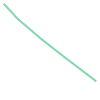

In [44]:
c

In [45]:
x,y = c.xy

### if we are lucky dta has CRS - common reporting standard, finding the cooridnates in the space,
otherwise we have to figure it out 

This is basically about mapping from the curved surface (earth) onto 2D image map

In [46]:
vds.crs # geojson standard it that it is usually Wgs84 standard

{'init': 'epsg:4326'}

In [47]:
plt.close() 
# if we dont close the figure before it wont be inteactive
# or it plots on the prev figure
plt.figure('fda')
plt.plot(x,y,'-ro',c=(1,0,0))
plt.axis('equal')

# use matplotlib gallery to check for the examples 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(12.46594985, 12.46658235, 41.896423575, 41.896954325)

# how to deal with the different coordinate system

In [58]:
import pyproj

In [59]:
filename = 'tifinWTGS_format.tif'

In [60]:
# getting original raster data set
# 52 - 54 -  review !!!!!!!!!!!!! when r
# import rasterio as rio
original_rds = rio.open(filename)

In [61]:
original_rds.crs

CRS.from_epsg(4326)

In [62]:
zip(x,y)

In [63]:
# getting all the coordinates listed and zipped
# lists are not really very efficient 
list(zip(x,y))

[(12.4665536, 41.8964477),
 (12.466416, 41.896553),
 (12.4663618, 41.8965935),
 (12.4662048, 41.8967167),
 (12.4660654, 41.8968361),
 (12.4659786, 41.8969302)]

In [64]:
import numpy as np 

In [65]:
x = np.asanyarray(x)
y = np.asanyarray(y)
np.sum(x)
vds

<open Collection 'export.geojson:export', mode 'r' at 0x7f77b742a510>

In [74]:
# transforming the values from one to another coordiantates
# in our case it is not transforming values because the values 
# were alrady transforemeed through qgis
pyproj.transform(pyproj.Proj(vds.crs),pyproj.Proj(rds1.crs),x,y)

/home/maciek/yes/envs/cse620b/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/maciek/yes/envs/cse620b/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  after removing the cwd from sys.path.


(array([41.8964477, 41.896553 , 41.8965935, 41.8967167, 41.8968361,
        41.8969302]),
 array([12.4665536, 12.466416 , 12.4663618, 12.4662048, 12.4660654,
        12.4659786]))

In [79]:
rds1.crs
vds.crs 
# geojson .wkt - world know text, text humans understand 

CRS.from_epsg(4326)

In [80]:
import shapely.ops

/home/maciek/yes/envs/cse620b/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/maciek/yes/envs/cse620b/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  after removing the cwd from sys.path.


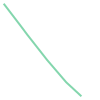

In [83]:
# this will apply to the whole geometry 
# takes x y of coordinates and transform it 
shapely.ops.transform(lambda x,y:pyproj.transform(pyproj.Proj(vds.crs),
                                                  pyproj.Proj(rds1.crs),
                                                  x,y),s)

In [ ]:
# lambda 
# first parameter and then the function applied to parameter
lambda x: x**2

In [88]:
def tran(x,y):
    return pyproj.transform(pyproj.Proj(vds.crs), # change this 
                     pyproj.Proj(rds1.crs), # on this 
                     x,y)

/home/maciek/yes/envs/cse620b/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/maciek/yes/envs/cse620b/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  after removing the cwd from sys.path.


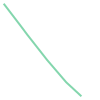

In [89]:
shapely.ops.transform(tran,s)

# matrix transfomation

In [104]:
A = np.array([[2.0,0.0],
             [0.0,1.0]])
A


array([[2., 0.],
       [0., 1.]])

tensor ND array of numbers
matrix 2D tensor

# some doubts about linear algebra 
mit.edu linear algebra 


In [99]:
B = np.row_stack([x,y])

In [102]:
B

array([[12.4665536, 12.466416 , 12.4663618, 12.4662048, 12.4660654,
        12.4659786],
       [41.8964477, 41.896553 , 41.8965935, 41.8967167, 41.8968361,
        41.8969302]])

In [106]:
# multiplying 2 matrixes 
A@B

array([[24.9331072, 24.932832 , 24.9327236, 24.9324096, 24.9321308,
        24.9319572],
       [41.8964477, 41.896553 , 41.8965935, 41.8967167, 41.8968361,
        41.8969302]])

a[0,0] - scales in X  
a[0,1] - skew/tilt of X (usually 0) if x,y axis are 'tilt'
then it means the matrix will rotated
a[1,0] kew/tilt of y (usually 0) if x,y axis are 'tilt'
then it means the matrix will rotated
a[1,1] - scales in Y

In [107]:
# inverse matrix 
A = np.linalg.inv(A)


In [109]:
A

array([[0.5, 0. ],
       [0. , 1. ]])

In [110]:
t = np.asarray([100,10])

In [111]:
A@B + t[:,None]

array([[106.2332768, 106.233208 , 106.2331809, 106.2331024, 106.2330327,
        106.2329893],
       [ 51.8964477,  51.896553 ,  51.8965935,  51.8967167,  51.8968361,
         51.8969302]])

In [113]:
# since t is 1D vector, to add it to the array we have to 
# add one more dimension to it
# we do this by adding None in the matrix 

t.shape

(2,)

In [114]:
t[:,None].shape

(2, 1)

In [115]:
# slicing in np
A[:,1]

array([0., 1.])

In [116]:
A[1,:]

array([0., 1.])

In [118]:
x = np.array([1,2,3,4])
x[:,None]


array([[1],
       [2],
       [3],
       [4]])

In [119]:
z = np.random.rand(5,6,7)

In [120]:
z.shape

(5, 6, 7)

In [121]:
z[None].shape

(1, 5, 6, 7)

In [123]:
z[:,None,:,None,:].shape

(5, 1, 6, 1, 7)

In [124]:
q = np.random.rand(5,7)

In [127]:
(z+q[:,None,:]).shape

(5, 6, 7)

In [128]:
# inteligently transpose the matrix
# we can choose where which axis would go
z.transpose(1,2,0).shape,z.shape

((6, 7, 5), (5, 6, 7))

In [129]:
import affine 

In [132]:
# A@ X +t --> affine transfore
# scale x (by A) and translating x
A = np.array([[1,0,10],
             [0, 2, 13]])
X = np.asarray([5,5,1]) 
# we add the last axis so we can rotate around it 
X

array([5, 5, 1])

In [136]:
# affine.Affine()
rds.affine(50,31)
# images (row and cols ) --> transform it to geo coordinates

AttributeError: 'DatasetReader' object has no attribute 'affine'

In [ ]:
# affine and 